#### Problem - Tutorial 2: Classification

Given a set of features or attributes of a bank note, can we predict whether it's authentic or fake?
Four attributes contribute to this classification:
1. variance or transformed image
2. skeweness
3. entropy
4. curtosis

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/dmatrix/tutorials/master/mlflow/images/bank_note.png"
         alt="Bank Note " width="600">
  </td></tr>
  <tr><td>
    <img src="https://databricks.com/wp-content/uploads/2020/04/matrix_morpheus.png"
         alt="Bank Note " width="600">
  </td></tr>
</table>

#### Solution:

We are going to use Random Forest Classification to make the prediction, and measure on the accuracy.
The closer to 1.0 is the accuracy the better is our confidence in its prediction.

This example is borrowed from these source, modified and modularized for this tutorial [source-1](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)
and data [source-2](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

Aim of this Lab:

1. Understand MLflow Tracking API
2. How to use the MLflow Tracking API
3. Use the MLflow API to experiment few Runs
4. Interpret and observer runs via the MLflow UI

Some resources:
* [MLflow Docs](https://mlflow.org/docs/latest/python_api/mlflow.html)
* [All about confufsion matrix](https://devopedia.org/confusion-matrix)
* [More on classification matrix](https://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/)
* [How to plot AUC and ROC](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

Define all the classes and bring them into scope

In [0]:
%run ./setup/class_setup

class utilitis definition `Utils`

Declared various Utitily class utility methods: 
 Declared load_data( path:file_name ) for data files 
 Declared plot_graphs( ... ) for ploting artifacts 
 Declared get_mlflow_directory_path for mlruns path 
 Declared get_temporary_directory_path( ... ) temporary artifact files 
 Declared plot_residual_graphs( ... ) for plotting residues 
 Declared print_pandas_dataset( name:String ) to print Pandas dataFrame


Random Forest class definition for the `RFRModel`

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


Declared RandomForestRegress Model Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...} returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Randorm Forest Classifier class definition `RFCModel`

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

Declared RandomForestClassifierModel Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared params() returns existing Random Forest Model's init parameters. 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Randorm Forest class defintions for:
 * `RFRBaseModel`
 * `RFFExperimentModel`

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


Declared RandomForestModel Base Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Declared RFFExperimentModel Extended Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

In [0]:
# load and print dataset
dataset = Utils.load_data("https://github.com/dmatrix/tutorials/raw/master/mlflow/labs/data/bill_authentication.csv")
dataset.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


2025/07/31 04:16:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-b2d30165-76df.cloud.databricks.com/ml/experiments/4230816160263187/models/m-ff425c1deb5d41ab8278660e060f20fc?o=4476931374519718
2025/07/31 04:16:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion matrix, without normalization
[[155   2]
 [  2 116]]
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id c6a70d28f26e43f3ba0ac2facb3c3a77 and experiment_id 4230816160263187
Estimators trees: 10
[[155   2]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy Score: 0.9854545454545455
Precision     : 0.9830508474576272
ROC           : 0.9851559969772212
MLflow Run completed with run_id c6a70d28f26e43f3ba0ac2facb3c3a77 and experiment_id 4230816160263187
----------------------------------------------------------------------------------------------------


2025/07/31 04:16:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-b2d30165-76df.cloud.databricks.com/ml/experiments/4230816160263187/models/m-bac3563298534f98905b0fd662176cdf?o=4476931374519718
2025/07/31 04:16:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion matrix, without normalization
[[155   2]
 [  2 116]]
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id e6f25e7cee8340c79a4067b083a9d31d and experiment_id 4230816160263187
Estimators trees: 20
[[155   2]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy Score: 0.9854545454545455
Precision     : 0.9830508474576272
ROC           : 0.9851559969772212
MLflow Run completed with run_id e6f25e7cee8340c79a4067b083a9d31d and experiment_id 4230816160263187
----------------------------------------------------------------------------------------------------


2025/07/31 04:16:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
🔗 View Logged Model at: https://dbc-b2d30165-76df.cloud.databricks.com/ml/experiments/4230816160263187/models/m-ff919c11a0cd4f9cb67710b78813ad5f?o=4476931374519718
2025/07/31 04:16:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion matrix, without normalization
[[155   2]
 [  2 116]]
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id b2ea6680e0ae4e45898832a7703fa713 and experiment_id 4230816160263187
Estimators trees: 30
[[155   2]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy Score: 0.9854545454545455
Precision     : 0.9830508474576272
ROC           : 0.9851559969772212
MLflow Run completed with run_id b2ea6680e0ae4e45898832a7703fa713 and experiment_id 4230816160263187
----------------------------------------------------------------------------------------------------


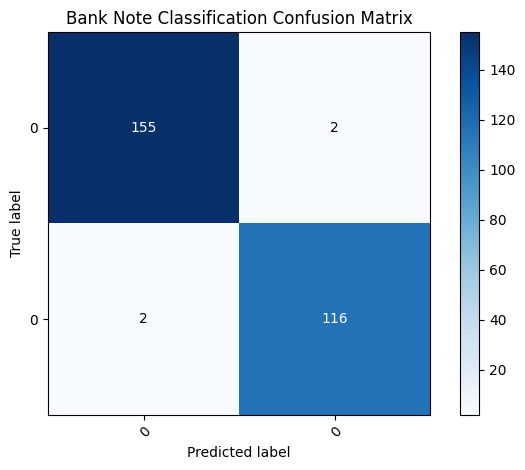

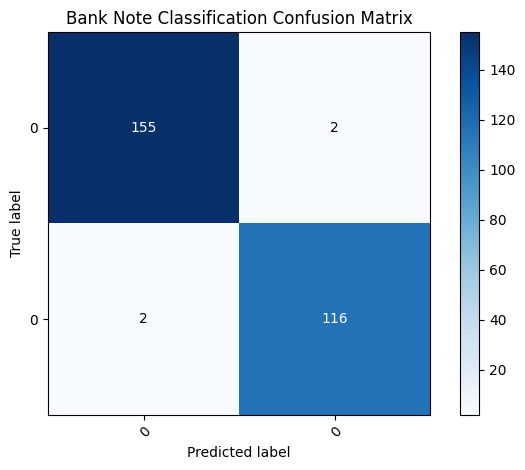

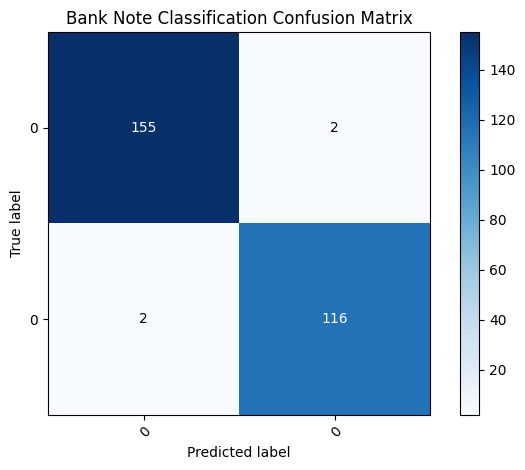

In [0]:
# iterate over several runs with different parameters
# TODO in the Lab (change these parameters, n_estimators and random_state
# with each iteration.
# Does that change the metrics and accuracy?
# start with n=10, step by 10 up to X <=40
for n in range(10, 40, 10):
  params = {"n_estimators": n, "random_state": 42}
  rfr = RFCModel.new_instance(params)
  (experimentID, runID) = rfr.mlflow_run(dataset)
  print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
  print("-" * 100)

#### Lab/Homework for Some Experimental run
1. Consult [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation
  * Change or add parameters, such as depth of the tree or random_state: 42 etc.
2. Change or alter the range of runs and increments of n_estimators
3. Check in MLfow UI if the metrics are affected
4. Try [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) instead of [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and examine if there is a difference in the metrics
5. Is the ROC for Randorm Forest better than LogisticRegression